# MultiPolygon `has_exterior_duplicates`
Function looks for all (Multi)Polygon features that has duplicated vertices on its exterior and mark them using boolean predicate.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

os.getcwd()

'/home/lukasz/Projects/geonurse/notebooks'

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint

from geonurse.tools.polygon import has_exterior_duplicates, _duplicated_exterior_coordinates_list

## Load data

In [4]:
DATA_PATH = '../tests/tools/polygon/data/exterior'

### Test layer 1

#### Read data

In [5]:
polygons = gpd.read_file(os.path.join(DATA_PATH, 'test_data_multipolygon_exterior_duplicates.geojson'))

In [6]:
polygons.head()

,id,geometry
0,1,"POLYGON ((151 -285, 352 -279, 352 -279, 364 -3..."
1,10,(POLYGON ((-43.99851510731804 50.9361132418613...
2,2,POLYGON ((435.8477564102565 -284.7503205128205...
3,3,POLYGON ((241.8759615384615 -29.32211538461519...
4,4,"POLYGON ((483.860576923077 -29.32211538461519,..."


#### Plot data

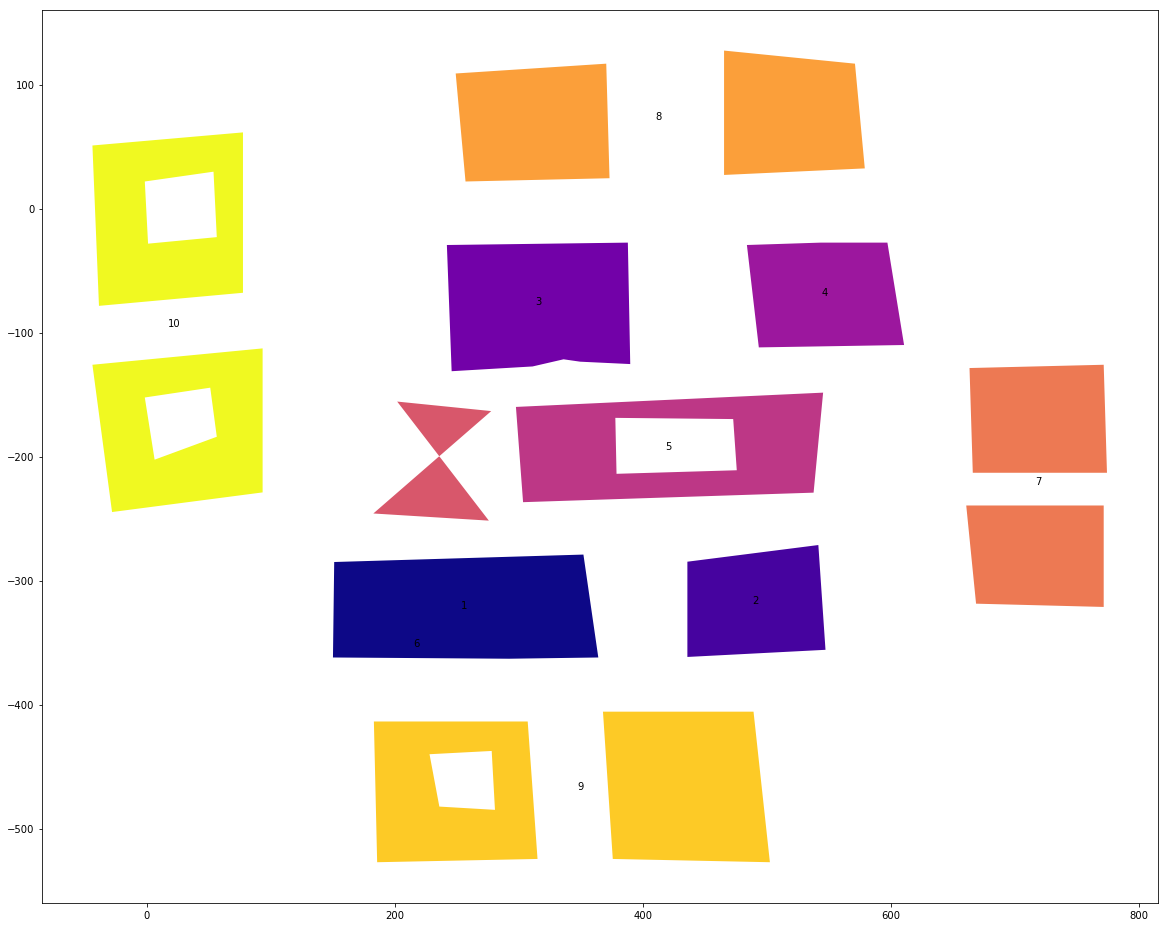

In [7]:
ax = polygons.plot(figsize=(20,20), column='id', cmap='plasma')

polygons.apply(lambda x: ax.annotate(s=x.id, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
print()

#### Find geometries with interiors

In [8]:
has_exterior_duplicates = polygons.geometry.apply(has_exterior_duplicates)

assert len(polygons) == len(has_exterior_duplicates)

polygons_with_exterior_duplicates = polygons[has_exterior_duplicates]  # select data that have interiors

In [9]:
polygons_with_exterior_duplicates.head()

,id,geometry
0,1,"POLYGON ((151 -285, 352 -279, 352 -279, 364 -3..."
1,10,(POLYGON ((-43.99851510731804 50.9361132418613...
2,2,POLYGON ((435.8477564102565 -284.7503205128205...
3,3,POLYGON ((241.8759615384615 -29.32211538461519...
4,4,"POLYGON ((483.860576923077 -29.32211538461519,..."


#### Plot filtered geometries

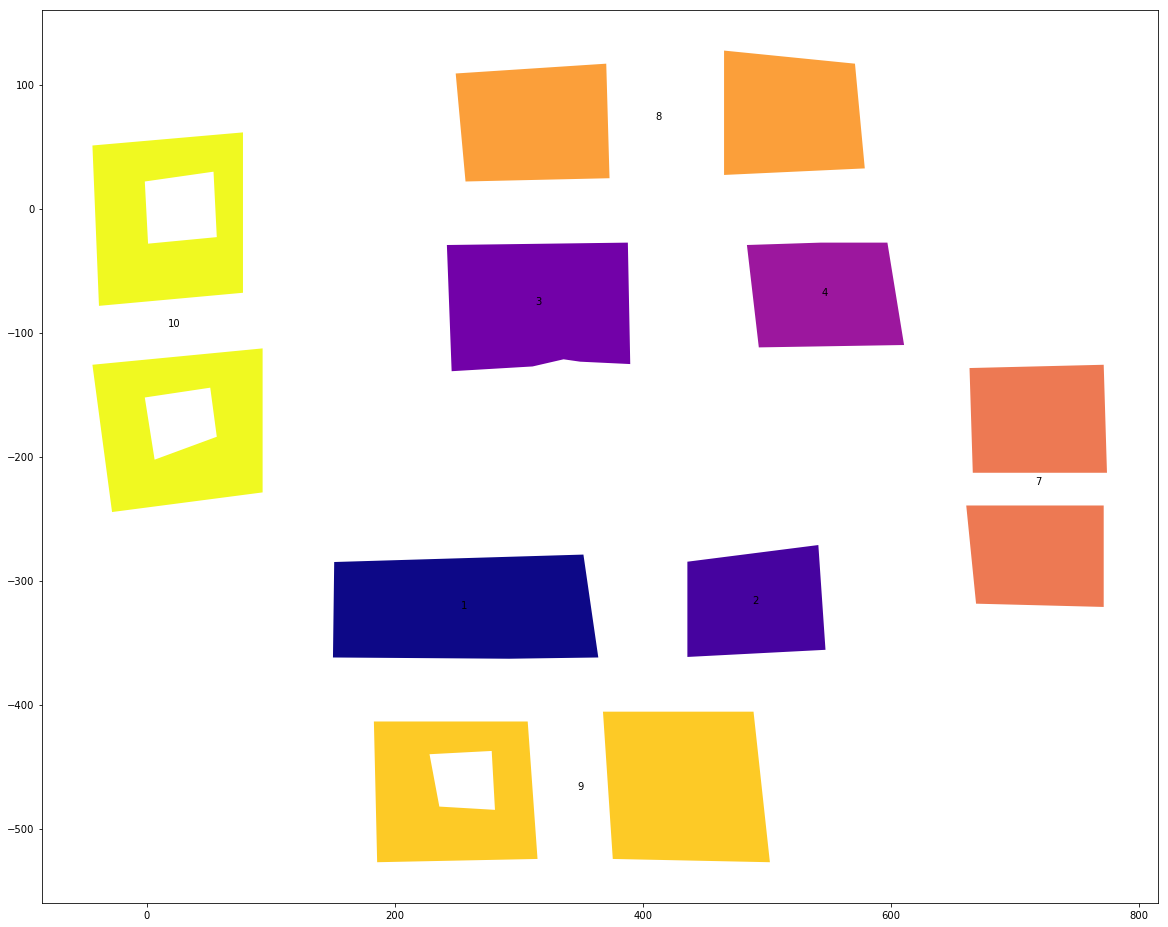

In [10]:
ax = polygons_with_exterior_duplicates.plot(figsize=(20,20), column='id', cmap='plasma')

polygons_with_exterior_duplicates.apply(lambda x: ax.annotate(s=x.id, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
print()

#### Save filtered geometries

polygons_with_exterior_duplicates.to_file(
    os.path.join(DATA_PATH, 'expected_multipolygon_with_exterior_duplicates.geojson'),
    driver='GeoJSON'
)